# Simple Risk Forecasting

This code demonstrates a simple risk forecasting simulation using Python. 

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from statistics import NormalDist

from sklearn.preprocessing import scale
import math
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

***
### Define Parameters
***

Define the minimum and maximum values for the probability of an event, the number of simulation trials, and the parameters for log-normal distribution.



In [3]:
# Define the minimum and maximum values for probability of event
MIN = .07
MAX = .17
# Define the number of trials
NUM_SAMPLES = 1000
# Define the log loss mean and standard deviation
LOG_MEAN = 12.55
LOG_STD = 3.06

In [4]:
# Initialize lists to store trial results
trial_results = []

In [5]:
# Ensure we always get the same numbers
# random.seed(42)

***
### Generate Random Probabilities
***

In [6]:
# Generate random numbers for each trial
for trial in range(NUM_SAMPLES):
    # Generate a random number between MIN and MAX, not assuming any underlying distribution 
    random_number = MIN + (MAX-MIN) * random.random()
    trial_results.append(random_number)

In [7]:
# Create a DataFrame to store the trial results
data = {'Frequency': np.arange(1, NUM_SAMPLES + 1), 'Probability_of_event': trial_results}
df = pd.DataFrame(data)

In [8]:
# Display the results
df

,Frequency,Probability_of_event
0,1,0.072783
1,2,0.107784
2,3,0.121950
3,4,0.118135
4,5,0.141986
...,...,...
995,996,0.139416
996,997,0.147615
997,998,0.119150
998,999,0.133528


***
### Simulate Events
***

Let's simulate events based on the generated probabilities.

In [9]:
# Each of the probabilities may lead to a simulated event
df['Simulated_event'] = df['Probability_of_event'].apply(lambda x : int(round(random.random() < x)))

In [10]:
# Display the results
df

,Frequency,Probability_of_event,Simulated_event
0,1,0.072783,0
1,2,0.107784,0
2,3,0.121950,0
3,4,0.118135,0
4,5,0.141986,1
...,...,...,...
995,996,0.139416,0
996,997,0.147615,0
997,998,0.119150,0
998,999,0.133528,1


***
### Simulate Losses
***

Let's simulate losses based on a log-normal distribution.

In [11]:
res = NormalDist(mu=LOG_MEAN, sigma=LOG_STD).inv_cdf(random.uniform(0, 1))

In [12]:
# Losses are log-normally distributed, around given mean and standard deviation
dist = []
for i in range(NUM_SAMPLES):
    res = NormalDist(mu=LOG_MEAN, sigma=LOG_STD).inv_cdf(random.uniform(0, 1))
    dist.append(res)

In [13]:
df['Possible_loss'] = pd.Series(dist, index=df.index)

In [14]:
# Display the results
df

,Frequency,Probability_of_event,Simulated_event,Possible_loss
0,1,0.072783,0,13.271678
1,2,0.107784,0,11.725442
2,3,0.121950,0,9.371626
3,4,0.118135,0,10.923560
4,5,0.141986,1,6.662659
...,...,...,...,...
995,996,0.139416,0,9.127598
996,997,0.147615,0,10.357502
997,998,0.119150,0,8.054368
998,999,0.133528,1,13.917978


***
### Calculate Simulated Loss
***

Calculate simulated loss for each trial

In [15]:
df['Simulated_loss'] = df['Simulated_event'] * df['Possible_loss']

***
### Logarithm Transformation
***

In [16]:
def logarithmbase10(x):
    try:
        return math.log10(x)
    except:
        return 0.0001

In [17]:
df['Log_simulated_loss'] = df['Simulated_loss'].apply(lambda x : logarithmbase10(x))

In [18]:
# Display the results
df

,Frequency,Probability_of_event,Simulated_event,Possible_loss,Simulated_loss,Log_simulated_loss
0,1,0.072783,0,13.271678,0.000000,0.000100
1,2,0.107784,0,11.725442,0.000000,0.000100
2,3,0.121950,0,9.371626,0.000000,0.000100
3,4,0.118135,0,10.923560,0.000000,0.000100
4,5,0.141986,1,6.662659,6.662659,0.823648
...,...,...,...,...,...,...
995,996,0.139416,0,9.127598,0.000000,0.000100
996,997,0.147615,0,10.357502,0.000000,0.000100
997,998,0.119150,0,8.054368,0.000000,0.000100
998,999,0.133528,1,13.917978,13.917978,1.143576


***
### Visualization
***

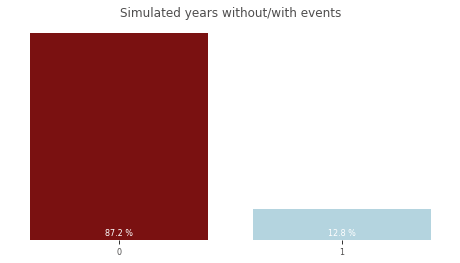

In [19]:
# Bar plot for simulated events

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data = df, x = df['Simulated_event'].value_counts().keys(), y = df['Simulated_event'].value_counts()/len(df)*100, 
            palette=['darkred', 'lightblue'])
plt.xlabel('')
plt.ylabel('')
plt.title('Simulated years without/with events', size=12, color='#4f4e4e')
plt.xticks(size=8, color='#4f4e4e')
plt.yticks([], [])
# plt.text(x=1, y=90, s='N events simulated in most years', 
#                  color='darkgrey', fontsize=8, horizontalalignment='center')
plt.text(x=0, y=2, s=" ".join([(round(df['Simulated_event'].value_counts()[0]/len(df)*100, 2)).astype('str'), "%"]),  
                 color='white', fontsize=8, horizontalalignment='center')
plt.text(x=1, y=2, s=" ".join([(round(df['Simulated_event'].value_counts()[1]/len(df)*100, 2)).astype('str'), "%"]),  
                 color='white', fontsize=8, horizontalalignment='center')
sns.despine(left=True, bottom=True)

In [20]:
actual_losses = [x for x in df['Log_simulated_loss'] if x > 0.0001]

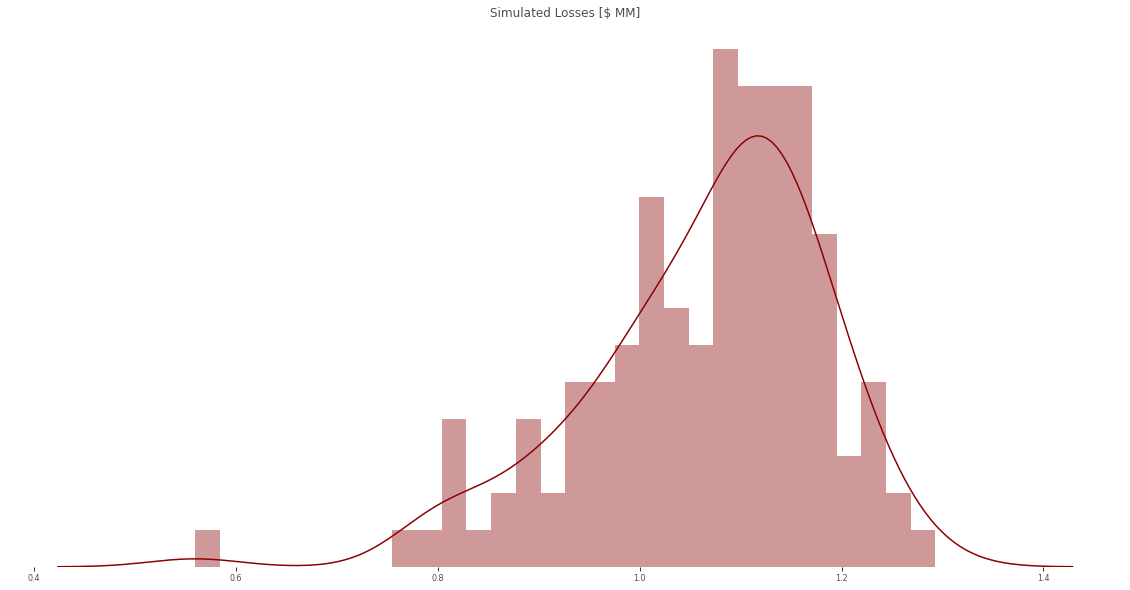

In [21]:
# Histogram for simulated losses

plt.figure(figsize=(20, 10))
sns.distplot(actual_losses, bins=30, color='darkred')
plt.xlabel('')
plt.ylabel('')
plt.title('Simulated Losses [$ MM]', size=12, color='#4f4e4e')
plt.xticks(size=8, color='#4f4e4e')
plt.yticks([], [])
sns.despine(left=True, bottom=True);